In [1]:
from math import exp
import numpy as np
import matplotlib.pyplot as plt

### Initialization ###
Initialize the scalar constants.

In [2]:
Vrest = -65      # Resting membrane voltage, unit: mV

EK    = -77      # Potassium Nernst voltage, unit: mV
GK    = 36       # Max potassium channel conductance, unit: mS / cm^2

n0    = 0.317711 # Initial n-gate value


dt    = 0.0005   # Integration time step, unit: ms
tend  = 10       # Integration end time, unit: ms

Initialize `Vclamp` as a list or array (or similar iterable), such that it contains all steps of the voltage clamp protocol.

`timesteps` should be a list, array or other iterable containing all timesteps for the simulation.

`alpha_n`, `beta_n`, `n`, and `IK` should be defined such that they can hold the calculated values for all timesteps and all clamp voltages.

In [3]:
Vclamp = [v for v in range(-100, 41, 10)]

num_Vsteps = len(Vclamp)
num_timesteps = int(tend/dt)

timesteps = np.linspace(0, tend, num_timesteps)

alpha_n = np.zeros([num_Vsteps, num_timesteps])
beta_n  = np.zeros([num_Vsteps, num_timesteps])
n       = np.zeros([num_Vsteps, num_timesteps])
IK      = np.zeros([num_Vsteps, num_timesteps])

### Calculation ###
For each voltage step, calculate the temporal progression of `alpha_n`, `beta_n`, `n`, and `IK`.

In [4]:
for i, v in enumerate(Vclamp):

    n[i, 0] = n0
    IK[i, 0] = GK * n[i, 0]**4 * (Vrest - EK)

    for j, t in enumerate(timesteps):
        Vm = v if t > 0.1 and t < 7 else Vrest

        if Vm == -55:
            alpha_n[i,j] = 0.1
        else:
            alpha_n[i,j] = 0.01 * -(Vm+55) / (exp(-(Vm+55)/10) - 1)
        beta_n[i,j]  = 0.125 * exp( -(Vm+65) / 80)

        if j < num_timesteps - 1:
            ndot = alpha_n[i, j] * (1 - n[i, j]) - beta_n[i, j] * n[i, j]
            n[i, j+1] = n[i, j] + ndot * dt
            IK[i, j+1] = GK * n[i, j]**4 * (Vm - EK)

### Plotting of Results ###
The following cell is intended to plot your results.
It expects `alpha_n`, `beta_n`, `n`, and `IK` to be matrices, where each row contains the temporal progression for one voltage step. That is, `alpha_n[0]` is a row that contains `alpha_n` for the voltage step `Vclamp[0]`.

In [15]:
# Make sure the matrices are in numpy format for the plotting code
_a_n = np.array(alpha_n)
_b_n = np.array(beta_n)
_n = np.array(n)
_i_k = np.array(IK)

# The following function checks whether the code is running in a Jupyter Notebook
# so that we know whether we can display widgets
def is_notebook():
    import sys
    return 'ipykernel' in sys.modules

# This function plots the results for one or more voltage steps.
# The parameter `steps` is a list of the step indices (referring to `Vclamp`) to display
def plot_voltage_steps(steps=[]):
    from matplotlib import pyplot as plt
    # The following function creates a figure with three subplots who share the x axis.
    # We can access the subplots by using the returned list `axes`.
    fig, axes = plt.subplots(nrows=4, sharex=True, sharey=False, figsize=(8, 10))
    axes[0].set_ylabel('$\\alpha_n$ (1/ms)')
    axes[1].set_ylabel('$\\beta_n$  (1/ms)')
    axes[2].set_ylabel('$n$')
    axes[3].set_xlabel('Time (ms)')
    axes[3].set_ylabel('Current density  (pA/pF)')
    
    if len(steps)==0:
        steps = range(0, _a_n.shape[0])
    
    for i in steps:
        axes[0].plot(timesteps, _a_n[i,:], label="{} mV".format(Vclamp[i]))
        axes[1].plot(timesteps, _b_n[i,:])
        axes[2].plot(timesteps, _n[i,:])
        axes[3].plot(timesteps, _i_k[i,:])
    axes[0].legend(bbox_to_anchor=(1, 1),loc=2)

    plt.suptitle('Voltage Clamp Protocol')
    plt.show()

if is_notebook():
    from ipywidgets import interact, SelectMultiple, Label
    from IPython.display import display
    voltage_steps = [('{} mV'.format(v), i) for i, v in enumerate(Vclamp)]
    display(Label(value='Select one or more voltage steps to display and compare (Ctrl+Click or Cmd+Click):'))
    interact(plot_voltage_steps, steps=SelectMultiple(options=voltage_steps, value=[2, 3, 4], description='Voltages:'))
else:
    plot_voltage_steps()

Label(value='Select one or more voltage steps to display and compare (Ctrl+Click or Cmd+Click):')

interactive(children=(SelectMultiple(description='Voltages:', index=(2, 3, 4), options=(('-100 mV', 0), ('-90 …

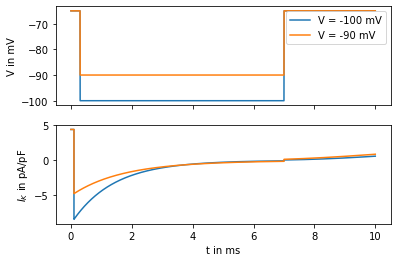

In [12]:
V = []
V2 = []
for t in timesteps:
    if 0.3 <  t < 7:
        V.append(-100)
        V2.append(-90)
    else:
        V.append(Vrest)
        V2.append(Vrest)
        
fig, (ax1, ax2) = plt.subplots(2,1, sharex=True)
ax1.plot(timesteps, V, label = 'V = -100 mV')
ax1.plot(timesteps, V2, label = 'V = -90 mV')
ax1.set_ylabel("V in mV")
ax1.legend()
# ax1.set_xlabel("t in ms")
# plt.savefig("voltage_clamp.png")
# plt.show()

ax2.plot(timesteps, IK[0,:])
ax2.plot(timesteps, IK[1,:])
ax2.set_ylabel('$I_K$ in pA/pF')
ax2.set_xlabel('t in ms')
# plt.savefig('K_current.png')
plt.show()